In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from IPython.display import display

### Create a sample for better usability and testing


In [2]:
#load dataset
df = pd.read_csv("Loan_Lending_Club.csv")
df.info()  # Show data structure

#Define desired sample size 
sample_size = 200000  

#Perform stratified sampling
df_sample = df.groupby('loan_status', group_keys=False).apply(lambda x: x.sample(frac=sample_size / len(df), random_state=42))

#Reset index
df_sample = df_sample.reset_index(drop=True)

#check sample distribution
print(df_sample['loan_status'].value_counts(normalize=True))


/var/folders/7p/rrjg4t7d2c3dg60v0nymk5y80000gn/T/ipykernel_46438/3495176905.py:2: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Loan_Lending_Club.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(2), object(34)
memory usage: 2.1+ GB
loan_status
Fully Paid            0.610402
Current               0.226679
Charged Off           0.154519
Late (31-120 days)    0.004695
In Grace Period       0.002780
Late (16-30 days)     0.000750
Default               0.000175
Name: proportion, dtype: float64


In [3]:
df_sample.to_csv("Loan_Lending_Club_Sampled.csv", index=False)


### Bould correlation heatmap

/var/folders/7p/rrjg4t7d2c3dg60v0nymk5y80000gn/T/ipykernel_46438/855787149.py:7: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Loan_Lending_Club.csv")


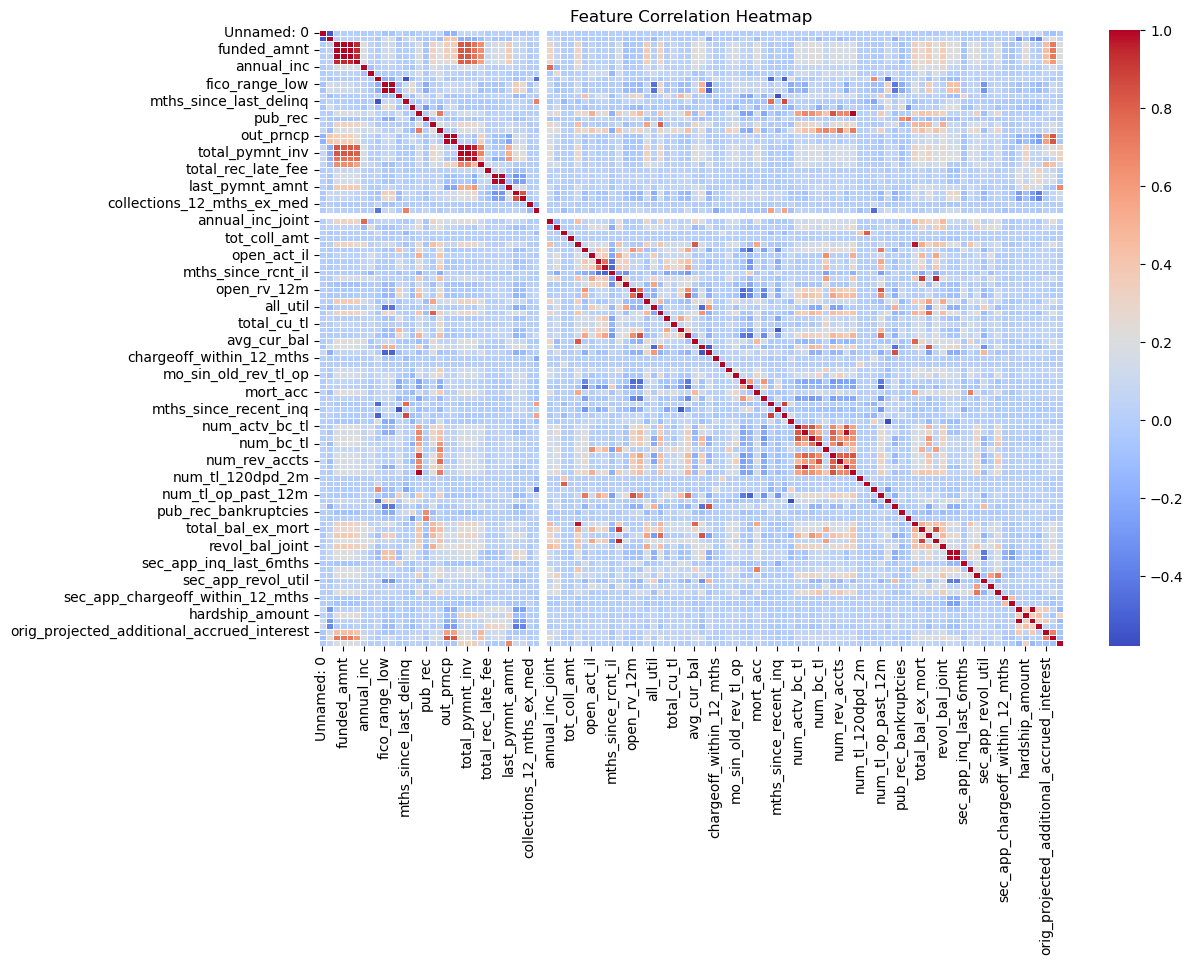

Highly Correlated Feature Pairs:


,Feature 1,Feature 2,Correlation
211,loan_amnt,funded_amnt,0.999999
212,loan_amnt,funded_amnt_inv,0.999994
213,loan_amnt,installment,0.945133
228,loan_amnt,total_pymnt,0.828604
229,loan_amnt,total_pymnt_inv,0.828653
315,funded_amnt,funded_amnt_inv,0.999995
316,funded_amnt,installment,0.945134
331,funded_amnt,total_pymnt,0.828604
332,funded_amnt,total_pymnt_inv,0.828654
418,funded_amnt_inv,installment,0.945054


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#select sample
df = pd.read_csv("Loan_Lending_Club.csv")

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold for high correlation (e.g., 0.75)
threshold = 0.75

# Identify highly correlated columns
high_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Only upper triangle
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.loc[abs(high_corr_pairs['Correlation']) > threshold]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
display(high_corr_pairs)


In [5]:
correlated_columns_to_drop = [
    "funded_amnt_inv", "installment", "total_pymnt_inv", "fico_range_low",
    "mths_since_recent_bc_dq", "mths_since_recent_revol_delinq", "num_sats", 
    "total_rev_hi_lim", "num_rev_accts", "out_prncp_inv", "hardship_payoff_balance_amount",
    "total_rec_prncp", "collection_recovery_fee", "last_fico_range_low", "num_tl_30dpd",
    "avg_cur_bal", "tot_hi_cred_lim", "total_bal_ex_mort", "total_il_high_credit_limit",
    "open_rv_24m", "num_tl_op_past_12m", "acc_open_past_24mths", "num_bc_sats",
    "num_op_rev_tl", "sec_app_fico_range_low"
]

## Data Cleaning: Dropping Unnecessary Columns

To ensure the integrity of our model, I have manually removed columns that fall into the following categories:

- **Susceptible to Data Leakage:** Variables that contain information unavailable at the time of loan approval (e.g., payment history, loan status updates, hardship records).
- **Irrelevant to the Analysis:** Columns that do not provide meaningful predictive value or are redundant (e.g., URLs, unique identifiers, unnamed: 0).
- **Potentially Redundant or Non-Predictive:** Features that are unlikely to contribute significantly to the model's predictive power (e.g., descriptive fields with no numerical impact).
- **Columns that only had one variable** These variables add no predictive value(e.g,pymnt_plan)
- **have to do with joint loans** We are not envolving joint loans for simplicity 

In [6]:
manual_columns_to_drop = [
    'sub_grade', 'Unnamed: 0', 'hardship_end_date', 'inq_last_6mths',
    'initial_list_status', 'sec_app_inq_last_6mths', 'mths_since_last_record', 
    'hardship_flag', 'out_prncp', 'tot_coll_amt', 'last_pymnt_d', 
    'verification_status_joint', 'total_rec_late_fee', 'last_pymnt_amnt', 'title',
    'sec_app_num_rev_accts', 'acc_now_delinq', 'next_pymnt_d', 'payment_plan_start_date', 
    'annual_inc_joint', 'hardship_last_payment_amount', 'last_credit_pull_d', 'zip_code', 
    'recoveries', 'sec_app_collections_12_mths_ex_med', 'inq_last_12m', 'id', 'revol_bal_joint', 
    'mths_since_last_delinq', 'hardship_start_date', 'debt_settlement_flag', 'sec_app_earliest_cr_line', 
    'hardship_length', 'hardship_status', 'url', 'sec_app_open_act_il', 'emp_title', 
    'hardship_reason', 'sec_app_mort_acc', 'last_fico_range_high', 
    'orig_projected_additional_accrued_interest', 'dti_joint', 'hardship_type', 
    'sec_app_open_acc', 'verification_status', 'sec_app_chargeoff_within_12_mths', 
    'hardship_loan_status', 'sec_app_revol_util', 'sec_app_fico_range_high', 
    'hardship_amount', 'mths_since_last_major_derog', 'hardship_dpd', 'deferral_term', 
    'addr_state', 'purpose', 'revol_util', 'pymnt_plan', 'total_pymnt'
]


all_columns_to_drop = set(manual_columns_to_drop + correlated_columns_to_drop)  # Combine both lists

df = df.drop(columns=all_columns_to_drop, errors='ignore')



### Filter loan status and individual loans


In [7]:
# Check unique loan statuses
print("Unique loan statuses before filtering:", df['loan_status'].unique())

# Define finished loan statuses
finished_statuses = ["Fully Paid", "Charged Off"]

# Filter dataset to keep only finished loans
df_filtered = df[df['loan_status'].isin(finished_statuses)]

# Display filtered dataset info
print("Loan statuses after filtering:")
print(df_filtered['loan_status'].value_counts())

# Filter out "Joint App" applications
df_filtered = df_filtered[df_filtered['application_type'] == 'Individual']

# Check if filtering worked
print("Application types after filtering:", df_filtered['application_type'].unique())  # Should only show "Individual"

# Drop "application_type" column if it's no longer needed
df_filtered = df_filtered.drop(columns=['application_type'])

# Show first few rows after filtering
df_filtered.head()

Unique loan statuses before filtering: ['Fully Paid' 'Current' 'Late (31-120 days)' 'Charged Off'
 'In Grace Period' 'Late (16-30 days)' 'Default']
Loan statuses after filtering:
loan_status
Fully Paid     1239089
Charged Off     313664
Name: count, dtype: int64
Application types after filtering: ['Individual']


,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit
0,12000.0,12000.0,36 months,7.97%,A,10+ years,OWN,42000.0,2017-09-01,Fully Paid,...,2.0,7.0,6.0,0.0,0.0,100.0,0.0,1.0,0.0,15500.0
6,10000.0,10000.0,36 months,9.44%,B,3 years,MORTGAGE,55000.0,2017-09-01,Fully Paid,...,1.0,5.0,2.0,0.0,0.0,100.0,0.0,1.0,0.0,10500.0
8,12800.0,12800.0,36 months,13.59%,C,5 years,RENT,90000.0,2017-09-01,Fully Paid,...,6.0,15.0,6.0,NaN,0.0,83.0,83.3,0.0,0.0,14750.0
12,15000.0,15000.0,36 months,13.59%,C,4 years,MORTGAGE,180000.0,2017-09-01,Fully Paid,...,16.0,17.0,14.0,0.0,0.0,100.0,72.7,0.0,0.0,116700.0
13,40000.0,40000.0,60 months,7.97%,A,10+ years,OWN,200000.0,2017-09-01,Charged Off,...,10.0,35.0,6.0,0.0,0.0,100.0,0.0,0.0,0.0,48400.0


### Fill missing values


In [8]:
missing_summary = pd.DataFrame({
    'Total Missing': df_filtered.isnull().sum(),
    'Percentage Missing': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary["Total Missing"] > 0]
print(missing_summary)

df_cleaned= df_filtered.drop(columns=missing_summary[missing_summary['Percentage Missing'] > 50].index)

df_cleaned.head(5)

                          Total Missing  Percentage Missing
emp_length                        92722            6.209122
open_acc_6m                      618157           41.394839
open_act_il                      618156           41.394772
open_il_12m                      618156           41.394772
open_il_24m                      618156           41.394772
mths_since_rcnt_il               643484           43.090860
total_bal_il                     618156           41.394772
il_util                          739274           49.505431
open_rv_12m                      618156           41.394772
max_bal_bc                       618156           41.394772
all_util                         618242           41.400531
inq_fi                           618156           41.394772
total_cu_tl                      618157           41.394839
bc_open_to_buy                    16224            1.086439
bc_util                           17075            1.143426
mo_sin_old_il_acct                43792 

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit
0,12000.0,12000.0,36 months,7.97%,A,10+ years,OWN,42000.0,2017-09-01,Fully Paid,...,2.0,7.0,6.0,0.0,0.0,100.0,0.0,1.0,0.0,15500.0
6,10000.0,10000.0,36 months,9.44%,B,3 years,MORTGAGE,55000.0,2017-09-01,Fully Paid,...,1.0,5.0,2.0,0.0,0.0,100.0,0.0,1.0,0.0,10500.0
8,12800.0,12800.0,36 months,13.59%,C,5 years,RENT,90000.0,2017-09-01,Fully Paid,...,6.0,15.0,6.0,NaN,0.0,83.0,83.3,0.0,0.0,14750.0
12,15000.0,15000.0,36 months,13.59%,C,4 years,MORTGAGE,180000.0,2017-09-01,Fully Paid,...,16.0,17.0,14.0,0.0,0.0,100.0,72.7,0.0,0.0,116700.0
13,40000.0,40000.0,60 months,7.97%,A,10+ years,OWN,200000.0,2017-09-01,Charged Off,...,10.0,35.0,6.0,0.0,0.0,100.0,0.0,0.0,0.0,48400.0


In [9]:
# Fill missing numerical values with median
num_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Fill missing categorical values with "Unknown"
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna("Unknown")

# Check if missing values are gone
print("Total Missing Values After Filling:", df_cleaned.isnull().sum().sum())


Total Missing Values After Filling: 0


### Engeneer dates for better usability

In [10]:
# Convert earliest_cr_line to datetime and extract the year
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format='%b-%Y', errors='coerce').dt.year

# Convert int_rate to numeric
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '').astype(float)

# Extract year & month from issue_d, then drop issue_d
df_cleaned['issue_year'] = pd.to_datetime(df_cleaned['issue_d'], errors='coerce').dt.year
df_cleaned['issue_month'] = pd.to_datetime(df_cleaned['issue_d'], errors='coerce').dt.month
df_cleaned = df_cleaned.drop(columns=['issue_d'])

# Verify transformations
print(df_cleaned[['earliest_cr_line', 'int_rate', 'issue_year', 'issue_month']].head())


    earliest_cr_line  int_rate  issue_year  issue_month
0               1996      7.97        2017            9
6               2005      9.44        2017            9
8               1988     13.59        2017            9
12              1976     13.59        2017            9
13              2004      7.97        2017            9


In [11]:
df_cleaned['emp_length'].unique()


array(['10+ years', '3 years', '5 years', '4 years', '< 1 year',
       '6 years', '2 years', '8 years', 'Unknown', '7 years', '9 years',
       '1 year'], dtype=object)

### Convert some other features for usability

In [12]:
# Convert '< 1 year' to 0.5 years and '10+ years' to 11, handle 'Unknown' as NaN
df_cleaned['emp_length'] = df_cleaned['emp_length'].replace({'10+ years': '11', '< 1 year': '0.5', 'Unknown': np.nan})

# Extract numbers and convert to float
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.extract('(\d+)').astype(float)

# Fill missing values with the median employment length
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median())

# Define grade ranking
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Apply mapping
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)

# Check transformation
print(df_cleaned['grade'].unique())


# Check the transformation
print(df_cleaned['emp_length'].unique())



[7 6 5 4 2 1 3]
[11.  3.  5.  4.  0.  6.  2.  8.  7.  9.  1.]


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1493319 entries, 0 to 2029951
Data columns (total 59 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1493319 non-null  float64
 1   funded_amnt                 1493319 non-null  float64
 2   term                        1493319 non-null  object 
 3   int_rate                    1493319 non-null  float64
 4   grade                       1493319 non-null  int64  
 5   emp_length                  1493319 non-null  float64
 6   home_ownership              1493319 non-null  object 
 7   annual_inc                  1493319 non-null  float64
 8   loan_status                 1493319 non-null  object 
 9   dti                         1493319 non-null  float64
 10  delinq_2yrs                 1493319 non-null  float64
 11  earliest_cr_line            1493319 non-null  int32  
 12  fico_range_high             1493319 non-null  float64
 13  op

### Create X and y for mutual_info_classifier, to filter out any more columns that have no predictive power



In [14]:
# Define target variable (y) first before modifying X
y = df_cleaned['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})  # Convert to binary

# Now define X (independent variables)
X = df_cleaned.drop(columns=['loan_status'])  # Ensure target is removed from X

Check the predictive value of the features in X using Mutual information classifyer 


In [15]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns  # Keep all categorical features

# Compute Mutual Information scores ONLY for numerical features
mi_scores = mutual_info_classif(X[num_cols], y, discrete_features=False)

# Convert to DataFrame
mi_scores_df = pd.DataFrame({'Feature': num_cols, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

# Display MI scores
display(mi_scores_df)

,Feature,MI Score
16,policy_code,0.209170
18,open_acc_6m,0.111571
3,grade,0.095261
24,il_util,0.080798
21,open_il_24m,0.066478
25,open_rv_12m,0.066292
49,pct_tl_nvr_dlq,0.063209
28,inq_fi,0.057151
19,open_act_il,0.056455
4,emp_length,0.055493


In [16]:
# Define MI threshold
THRESHOLD = 0.002  #increase later if needed

# Select numerical features with MI Score above threshold
important_num_features = mi_scores_df[mi_scores_df['MI Score'] > THRESHOLD]['Feature'].tolist()

# Identify dropped features (features that were in num_cols but not in important_num_features)
dropped_features = list(set(num_cols) - set(important_num_features))





In [17]:

# Final feature selection: Keep selected numerical + all categorical features
final_features = important_num_features + cat_cols.tolist()

# Filter dataset to keep only selected features
X_final = X[final_features]

# Print the number of selected features
print(f"Number of selected features: {len(final_features)}")
print("Selected Features:")
print(final_features)

# Display first few rows of final dataset
display(X_final.head())


Number of selected features: 51
Selected Features:
['policy_code', 'open_acc_6m', 'grade', 'il_util', 'open_il_24m', 'open_rv_12m', 'pct_tl_nvr_dlq', 'inq_fi', 'open_act_il', 'emp_length', 'issue_year', 'int_rate', 'mths_since_rcnt_il', 'all_util', 'total_bal_il', 'num_actv_bc_tl', 'total_rec_int', 'max_bal_bc', 'mort_acc', 'percent_bc_gt_75', 'num_actv_rev_tl', 'fico_range_high', 'num_rev_tl_bal_gt_0', 'issue_month', 'open_il_12m', 'earliest_cr_line', 'num_bc_tl', 'mths_since_recent_inq', 'funded_amnt', 'loan_amnt', 'open_acc', 'mo_sin_rcnt_tl', 'pub_rec_bankruptcies', 'num_il_tl', 'pub_rec', 'delinq_2yrs', 'total_acc', 'mo_sin_rcnt_rev_tl_op', 'num_accts_ever_120_pd', 'bc_open_to_buy', 'dti', 'mths_since_recent_bc', 'total_bc_limit', 'annual_inc', 'tot_cur_bal', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'bc_util', 'total_cu_tl', 'term', 'home_ownership']


,policy_code,open_acc_6m,grade,il_util,open_il_24m,open_rv_12m,pct_tl_nvr_dlq,inq_fi,open_act_il,emp_length,...,mths_since_recent_bc,total_bc_limit,annual_inc,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,bc_util,total_cu_tl,term,home_ownership
0,1.0,1.0,7,73.0,3.0,2.0,100.0,1.0,2.0,11.0,...,14.0,15500.0,42000.0,30502.0,131.0,255.0,53.9,1.0,36 months,OWN
6,1.0,0.0,6,75.0,2.0,0.0,100.0,1.0,4.0,3.0,...,49.0,10500.0,55000.0,340607.0,144.0,73.0,65.2,1.0,36 months,MORTGAGE
8,1.0,2.0,5,91.0,3.0,1.0,83.0,0.0,3.0,5.0,...,5.0,14750.0,90000.0,93375.0,154.0,345.0,86.0,1.0,36 months,RENT
12,1.0,0.0,5,79.0,3.0,0.0,100.0,2.0,4.0,4.0,...,16.0,116700.0,180000.0,682000.0,132.0,489.0,86.0,8.0,36 months,MORTGAGE
13,1.0,1.0,7,99.0,6.0,1.0,100.0,4.0,9.0,11.0,...,28.0,48400.0,200000.0,354714.0,155.0,157.0,24.6,8.0,60 months,OWN


### Splitting the data and testing different models as well as hyperperamiter testing



In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# ------------------ Step 1: Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ Step 2: Data Preprocessing & Balancing ------------------

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define transformations
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])  # Standardization for numerical features
cat_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])  # One-Hot Encoding

# Column Transformer to Apply Transformations
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Balance the dataset with SMOTE (oversampling) and RandomUnderSampler (undersampling)
balancing_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  
    ('under_sampler', RandomUnderSampler(random_state=42))  
])

# Apply One-Hot Encoding first before balancing
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Convert encoded data back to DataFrame to retain column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())

# Apply balancing pipeline to training data
X_train_balanced, y_train_balanced = balancing_pipeline.fit_resample(X_train_encoded, y_train)

# Convert back to DataFrame (Fixing the "numpy.ndarray has no attribute 'columns'" error)
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_encoded.columns)

# ------------------ Step 3: Define Models ------------------
models = {
    "Logistic Regression": Pipeline([
        ('classifier', LogisticRegression(solver='liblinear', random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

# ------------------ Step 4: Hyperparameter Tuning (Light Tuning) ------------------
# Define parameter grids with minimal tuning (to save time)
rf_params = {"classifier__n_estimators": [50], "classifier__max_depth": [None]}
xgb_params = {"classifier__n_estimators": [50], "classifier__learning_rate": [0.1]}

# Perform GridSearchCV only on Random Forest and XGBoost
rf_grid = GridSearchCV(models["Random Forest"], rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_balanced, y_train_balanced)
models["Random Forest"] = rf_grid.best_estimator_

xgb_grid = GridSearchCV(models["XGBoost"], xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train_balanced, y_train_balanced)
models["XGBoost"] = xgb_grid.best_estimator_

# ------------------ Step 5: Model Training & Evaluation ------------------
results = []  # Store results

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # Train model
    y_pred = model.predict(X_test_encoded)  # Predictions
    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else 0

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    })

# ------------------ Step 6: Display Results ------------------
results_df = pd.DataFrame(results)
print(results_df)  # Print DataFrame in the console

# Print Best Parameters for Tuned Models
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best XGBoost Parameters:", xgb_grid.best_params_)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:47:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:47:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.681391   0.779549  0.681391  0.710668  0.732165
1        Random Forest  0.804446   0.765317  0.804446  0.762099  0.733485
2              XGBoost  0.799865   0.763660  0.799865  0.768581  0.730052
Best Random Forest Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best XGBoost Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


### Show cunfusion matrices


Confusion Matrix for Logistic Regression:
 [[164452  74500]
 [ 20657  39055]]


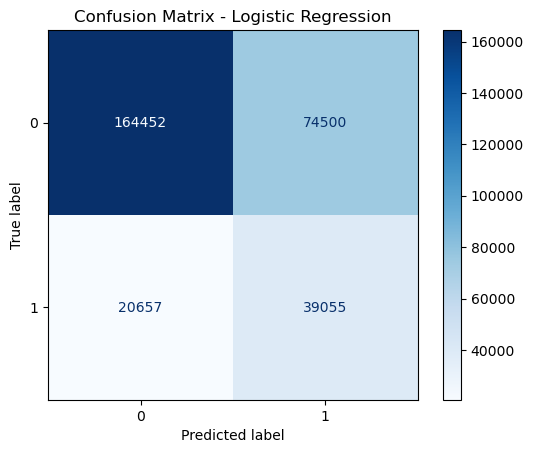


Confusion Matrix for Random Forest:
 [[229944   9008]
 [ 49397  10315]]


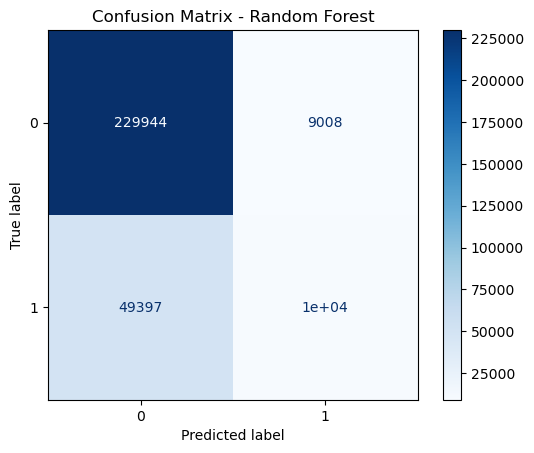


Confusion Matrix for XGBoost:
 [[225402  13550]
 [ 46223  13489]]


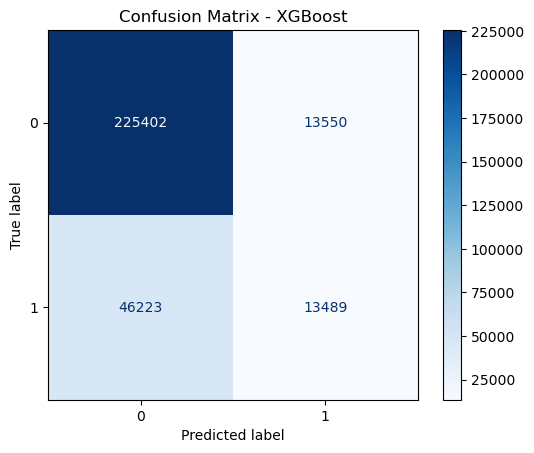

In [21]:
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_encoded)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the raw confusion matrix
    print(f"\nConfusion Matrix for {name}:\n", cm)

    # Display the confusion matrix visually
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


### Xgboost threshold testing


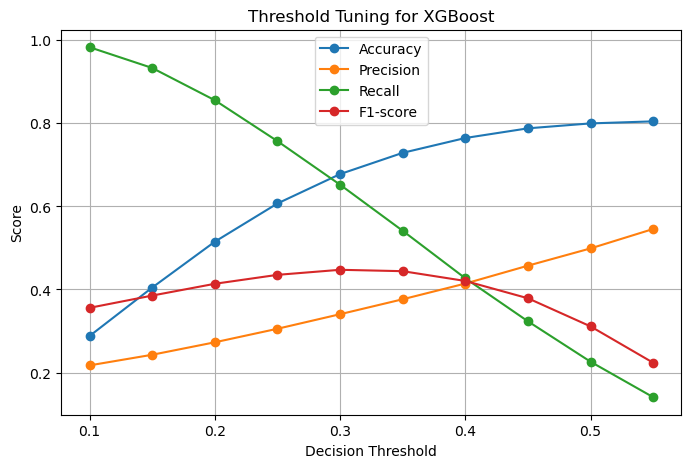

   Threshold  Accuracy  Precision    Recall  F1-score   ROC-AUC
0       0.10  0.287962   0.217159  0.983303  0.355751  0.548753
1       0.15  0.404545   0.242740  0.933330  0.385278  0.602868
2       0.20  0.515017   0.272752  0.855624  0.413644  0.642763
3       0.25  0.607070   0.305340  0.757101  0.435174  0.663340
4       0.30  0.677802   0.340405  0.652197  0.447331  0.668199
5       0.35  0.728980   0.376368  0.541231  0.443990  0.658564
6       0.40  0.764719   0.414210  0.426849  0.420434  0.637999
7       0.45  0.787993   0.457268  0.323201  0.378720  0.613671
8       0.50  0.799865   0.498872  0.225901  0.310982  0.584598
9       0.55  0.804764   0.545596  0.140474  0.223424  0.555619


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Get predicted probabilities for XGBoost
y_pred_proba = models["XGBoost"].predict_proba(X_test_encoded)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.6, 0.05)  # Testing thresholds from 0.1 to 0.6

# Store results
threshold_results = []

for threshold in thresholds:
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    
    # Compute metrics
    accuricuracy = accuracy_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom, zero_division=0)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    roc_auc = roc_auc_score(y_test, y_pred_custom)
    
    threshold_results.append({
        "Threshold": threshold,
        "Accuracy": accuricuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    })

# Convert to DataFrame
threshold_results_df = pd.DataFrame(threshold_results)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(threshold_results_df["Threshold"], threshold_results_df["Accuracy"], label="Accuracy", marker="o")
plt.plot(threshold_results_df["Threshold"], threshold_results_df["Precision"], label="Precision", marker="o")
plt.plot(threshold_results_df["Threshold"], threshold_results_df["Recall"], label="Recall", marker="o")
plt.plot(threshold_results_df["Threshold"], threshold_results_df["F1-score"], label="F1-score", marker="o")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for XGBoost")
plt.legend()
plt.grid()
plt.show()

# Display the table
print(threshold_results_df)


## Preprocessing the "open" status rows





**(I made a misteke by filtering on status very early on and need to now perform all the preprocessing steps)**


In [23]:
# Define OPEN loan statuses
open_statuses = ["Current"]

# Filter dataset to keep only open loans
df_filtered = df[df['loan_status'].isin(open_statuses)]

# Display filtered dataset info
print("Loan statuses after filtering:")
print(df_filtered['loan_status'].value_counts())

# Filter out "Joint App" applications
df_filtered = df_filtered[df_filtered['application_type'] == 'Individual']

# Check if filtering worked
print("Application types after filtering:", df_filtered['application_type'].unique())  # Should only show "Individual"

# Drop "application_type" column if it's no longer needed
df_filtered = df_filtered.drop(columns=['application_type'])

missing_summary = pd.DataFrame({
    'Total Missing': df_filtered.isnull().sum(),
    'Percentage Missing': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary["Total Missing"] > 0]
print(missing_summary)

df_cleaned= df_filtered.drop(columns=missing_summary[missing_summary['Percentage Missing'] > 50].index)

dropped_features_IMC = [
    "revol_bal",
    "num_tl_90g_dpd_24m",
    "collections_12_mths_ex_med",
    "tax_liens",
    "chargeoff_within_12_mths",
    "num_tl_120dpd_2m",
    "delinq_amnt"
]
df_cleaned = df_cleaned.drop(columns=dropped_features_IMC, errors="ignore")

# Fill missing numerical values with median
num_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Fill missing categorical values with "Unknown"
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna("Unknown")

# Check if missing values are gone
print("Total Missing Values After Filling:", df_cleaned.isnull().sum().sum())

# Convert earliest_cr_line to datetime and extract the year
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format='%b-%Y', errors='coerce').dt.year

# Convert int_rate to numeric
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '').astype(float)

# Extract year & month from issue_d, then drop issue_d
df_cleaned['issue_year'] = pd.to_datetime(df_cleaned['issue_d'], errors='coerce').dt.year
df_cleaned['issue_month'] = pd.to_datetime(df_cleaned['issue_d'], errors='coerce').dt.month
df_cleaned = df_cleaned.drop(columns=['issue_d'])

# Convert '< 1 year' to 0.5 years and '10+ years' to 11, handle 'Unknown' as NaN
df_cleaned['emp_length'] = df_cleaned['emp_length'].replace({'10+ years': '11', '< 1 year': '0.5', 'Unknown': np.nan})

# Extract numbers and convert to float
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.extract('(\d+)').astype(float)

# Fill missing values with the median employment length
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median())

# Define grade ranking
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Apply mapping
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)



Loan statuses after filtering:
loan_status
Current    460148
Name: count, dtype: int64
Application types after filtering: ['Individual']
                          Total Missing  Percentage Missing
emp_length                        27383            6.823964
open_acc_6m                       16189            4.034370
open_act_il                       16189            4.034370
open_il_12m                       16189            4.034370
open_il_24m                       16189            4.034370
mths_since_rcnt_il                29885            7.447474
total_bal_il                      16189            4.034370
il_util                           75351           18.777802
open_rv_12m                       16189            4.034370
max_bal_bc                        16189            4.034370
all_util                          16256            4.051067
inq_fi                            16189            4.034370
total_cu_tl                       16189            4.034370
bc_open_to_buy         

### Run the model on open loans

In [24]:
# Apply the same encoding used in training
X_open_encoded = preprocessor.transform(df_cleaned)

# Convert to DataFrame to retain feature names
X_open_encoded = pd.DataFrame(X_open_encoded, columns=preprocessor.get_feature_names_out())

# Ensure the dataset has the same features as the training set
X_open_encoded = X_open_encoded.reindex(columns=X_train_balanced.columns, fill_value=0)



In [25]:
# Predict probabilities of default using the trained XGBoost model
y_pred_proba = models["XGBoost"].predict_proba(X_open_encoded)[:, 1]  # Probability of default (class 1)


In [26]:
# Apply threshold: Loans with probability ≥ 0.25 are classified as High Default Risk
df_cleaned["default_probability"] = y_pred_proba
df_cleaned["predicted_status"] = (df_cleaned["default_probability"] >= 0.50).astype(int)

# Convert 0/1 predictions to labels
df_cleaned["predicted_label"] = df_cleaned["predicted_status"].map({0: "Likely Fully Paid", 1: "High Default Risk"})


In [27]:
# Count the number of high-risk loans
num_high_risk = df_cleaned[df_cleaned["predicted_status"] == 1].shape[0]

# Calculate the total loan amount at risk
total_risk_amount = df_cleaned.loc[df_cleaned["predicted_status"] == 1, "loan_amnt"].sum()

# Display results
print(f" Number of High-Risk Loans: {num_high_risk}")
print(f" Total At-Risk Loan Amount: ${total_risk_amount:,.2f}")

# Display top risky loans
df_cleaned[df_cleaned["predicted_status"] == 1].head(10)


 Number of High-Risk Loans: 30340
 Total At-Risk Loan Amount: $541,735,100.00


,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,dti,...,num_rev_tl_bal_gt_0,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bc_limit,issue_year,issue_month,default_probability,predicted_status,predicted_label
77,16000.0,16000.0,60 months,12.62,5,11.0,RENT,89000.0,Current,25.40,...,11.0,92.6,100.0,0.0,21000.0,2017,9,0.566636,1,High Default Risk
243,14000.0,14000.0,36 months,29.69,2,4.0,RENT,60000.0,Current,16.88,...,0.0,86.2,0.0,0.0,300.0,2017,9,0.512964,1,High Default Risk
412,12000.0,12000.0,60 months,20.00,4,2.0,RENT,55000.0,Current,23.81,...,5.0,100.0,100.0,0.0,14800.0,2017,9,0.556693,1,High Default Risk
483,15775.0,15775.0,60 months,26.30,3,7.0,RENT,31599.0,Current,37.60,...,8.0,84.4,75.0,0.0,10500.0,2017,9,0.643240,1,High Default Risk
485,12000.0,12000.0,60 months,18.06,4,3.0,RENT,72000.0,Current,25.64,...,10.0,100.0,57.1,0.0,55100.0,2017,9,0.615448,1,High Default Risk
492,13000.0,13000.0,60 months,19.03,4,2.0,OWN,30000.0,Current,30.40,...,4.0,100.0,40.0,0.0,17000.0,2017,9,0.506074,1,High Default Risk
502,12100.0,12100.0,60 months,30.17,2,1.0,RENT,36000.0,Current,27.87,...,2.0,90.0,0.0,0.0,7300.0,2017,9,0.517694,1,High Default Risk
524,40000.0,40000.0,60 months,21.45,4,5.0,RENT,239000.0,Current,21.39,...,5.0,100.0,100.0,0.0,71800.0,2017,9,0.506789,1,High Default Risk
615,10000.0,10000.0,60 months,15.05,5,5.0,RENT,50000.0,Current,20.31,...,6.0,100.0,66.7,1.0,6700.0,2017,9,0.516435,1,High Default Risk
885,15600.0,15600.0,60 months,14.08,5,11.0,RENT,60000.0,Current,15.30,...,6.0,100.0,0.0,0.0,25000.0,2017,9,0.520352,1,High Default Risk


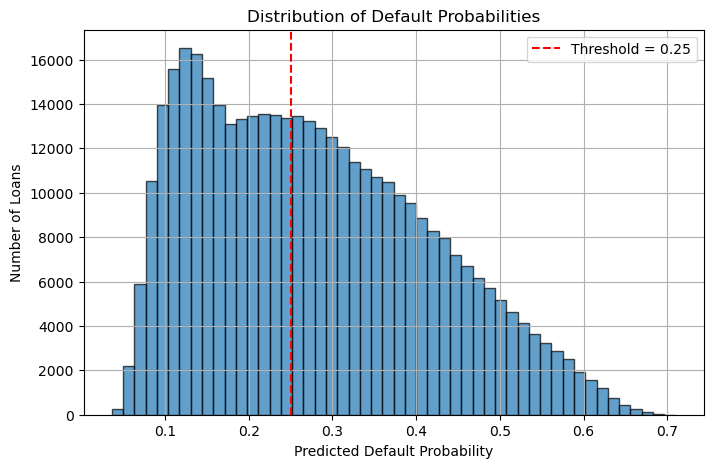

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_cleaned["default_probability"], bins=50, edgecolor="black", alpha=0.7)
plt.axvline(x=0.25, color='red', linestyle='--', label="Threshold = 0.25")
plt.xlabel("Predicted Default Probability")
plt.ylabel("Number of Loans")
plt.title("Distribution of Default Probabilities")
plt.legend()
plt.grid()
plt.show()


### Risk by loan 0.25 threshold

  grade  High_Risk_Loans  At_Risk_Loan_Amount
4     C             7332          134726100.0
3     D            12180          207245425.0
2     E             7605          137361850.0
1     F             2465           47253575.0
0     G              758           15148150.0


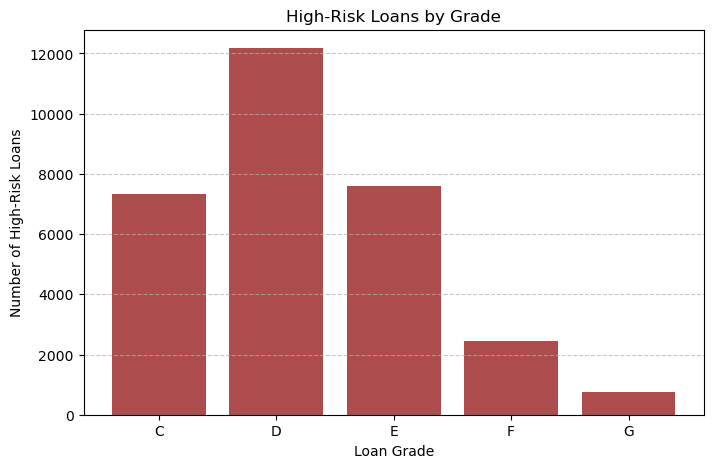

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Reverse the grade mapping
reverse_grade_mapping = {v: k for k, v in grade_mapping.items()}

# Group by grade and count high-risk loans
high_risk_by_grade = df_cleaned[df_cleaned["predicted_status"] == 1].groupby("grade").agg(
    High_Risk_Loans=("predicted_status", "count"),
    At_Risk_Loan_Amount=("loan_amnt", "sum")
).reset_index()

# Convert numeric grades back to letter grades
high_risk_by_grade["grade"] = high_risk_by_grade["grade"].map(reverse_grade_mapping)

# Sort by grade (optional)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Ensure correct ordering
high_risk_by_grade["grade"] = pd.Categorical(high_risk_by_grade["grade"], categories=grade_order, ordered=True)
high_risk_by_grade = high_risk_by_grade.sort_values(by="grade")

# Display the grouped results
print(high_risk_by_grade)

# Plot the number of high-risk loans per grade
plt.figure(figsize=(8, 5))
plt.bar(high_risk_by_grade["grade"], high_risk_by_grade["High_Risk_Loans"], color="darkred", alpha=0.7)
plt.xlabel("Loan Grade")
plt.ylabel("Number of High-Risk Loans")
plt.title("High-Risk Loans by Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Risk by grade 0.5 threshold

  grade  High_Risk_Loans  At_Risk_Loan_Amount  Total_Loans  Default_Rate
4     C             7332          134726100.0       117202      0.062559
3     D            12180          207245425.0        51506      0.236477
2     E             7605          137361850.0        16099      0.472390
1     F             2465           47253575.0         3508      0.702680
0     G              758           15148150.0          983      0.771109


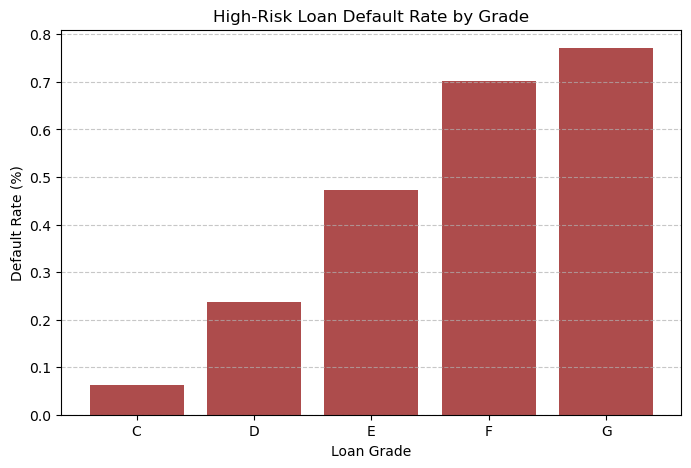

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Reverse the grade mapping
reverse_grade_mapping = {v: k for k, v in grade_mapping.items()}

# Group by grade to get total loans per grade
total_loans_by_grade = df_cleaned.groupby("grade")["loan_amnt"].count().reset_index()
total_loans_by_grade.columns = ["grade", "Total_Loans"]

# Group by grade to count high-risk loans and sum at-risk loan amounts
high_risk_by_grade = df_cleaned[df_cleaned["predicted_status"] == 1].groupby("grade").agg(
    High_Risk_Loans=("predicted_status", "count"),
    At_Risk_Loan_Amount=("loan_amnt", "sum")
).reset_index()

# Merge with total loans to calculate risk percentage
high_risk_by_grade = high_risk_by_grade.merge(total_loans_by_grade, on="grade")
high_risk_by_grade["Default_Rate"] = high_risk_by_grade["High_Risk_Loans"] / high_risk_by_grade["Total_Loans"]

# Convert numeric grades back to letter grades
high_risk_by_grade["grade"] = high_risk_by_grade["grade"].map(reverse_grade_mapping)

# Sort by grade (optional)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Ensure correct ordering
high_risk_by_grade["grade"] = pd.Categorical(high_risk_by_grade["grade"], categories=grade_order, ordered=True)
high_risk_by_grade = high_risk_by_grade.sort_values(by="grade")

# Display the grouped results
print(high_risk_by_grade)

# Plot the default rate per grade
plt.figure(figsize=(8, 5))
plt.bar(high_risk_by_grade["grade"], high_risk_by_grade["Default_Rate"], color="darkred", alpha=0.7)
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate (%)")
plt.title("High-Risk Loan Default Rate by Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Startegy assesment based on loan amount, interest rates and predicted default

In [33]:
# Predict probabilities
y_probs = model.predict_proba(X_test_encoded)[:, 1]  # Get probability for default

# Apply threshold (0.25)
y_pred = np.where(y_probs >= 0.25, 1, 0)  # 1 = Default (Charged Off), 0 = Fully Paid

# Add predictions to test dataset
X_test_encoded["Predicted_Default"] = y_pred



In [46]:
# Merge with actual test labels and interest rate/loan amount
results_df = X_test_encoded.copy()
results_df["Actual_Default"] = y_test  # Add actual loan status
results_df["Probability_Default"] = y_probs  # Probability of default

print(results_df.columns)  # See all available columns


# Group by credit grade
grade_analysis = results_df.groupby("num__grade", as_index=False).agg(
    Default_Rate=("Predicted_Default", "mean"),
    Avg_Interest_Rate=("num__int_rate", "mean"),
    Avg_Loan_Amount=("num__loan_amnt", "mean"),
    Total_Loans=("num__loan_amnt", "count")
).reset_index()

# Compute expected return: Interest income - Default loss
grade_analysis["Expected_Profitability"] = (
    grade_analysis["Avg_Interest_Rate"] * grade_analysis["Avg_Loan_Amount"]
    - (grade_analysis["Default_Rate"] * grade_analysis["Avg_Loan_Amount"])
)

# Compute risk-adjusted return: Profitability per unit of default risk
grade_analysis["Risk_Adjusted_Return"] = (
    grade_analysis["Expected_Profitability"] / grade_analysis["Default_Rate"]
)

# Display results
print(grade_analysis)


Index(['num__policy_code', 'num__open_acc_6m', 'num__grade', 'num__il_util',
       'num__open_il_24m', 'num__open_rv_12m', 'num__pct_tl_nvr_dlq',
       'num__inq_fi', 'num__open_act_il', 'num__emp_length', 'num__issue_year',
       'num__int_rate', 'num__mths_since_rcnt_il', 'num__all_util',
       'num__total_bal_il', 'num__num_actv_bc_tl', 'num__total_rec_int',
       'num__max_bal_bc', 'num__mort_acc', 'num__percent_bc_gt_75',
       'num__num_actv_rev_tl', 'num__fico_range_high',
       'num__num_rev_tl_bal_gt_0', 'num__issue_month', 'num__open_il_12m',
       'num__earliest_cr_line', 'num__num_bc_tl', 'num__mths_since_recent_inq',
       'num__funded_amnt', 'num__loan_amnt', 'num__open_acc',
       'num__mo_sin_rcnt_tl', 'num__pub_rec_bankruptcies', 'num__num_il_tl',
       'num__pub_rec', 'num__delinq_2yrs', 'num__total_acc',
       'num__mo_sin_rcnt_rev_tl_op', 'num__num_accts_ever_120_pd',
       'num__bc_open_to_buy', 'num__dti', 'num__mths_since_recent_bc',
       'num__tot